# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [31]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import wrangle
import env
import os
from sklearn.model_selection import train_test_split

## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [13]:
# Use our wrangle function to acquire and prepare our data.
# Read data from the student_grades table in the school_sample database on our mySQL server. 

df = pd.read_clipboard()

In [14]:
#look at your data!
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97


In [16]:
df.isna().sum()

student_id     0
exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [17]:
df['exam3'] = df.exam3.replace(r'

SyntaxError: EOL while scanning string literal (672106979.py, line 1)

In [28]:
df = clean_data(df)

In [29]:
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [32]:
def clean_data(df):
    '''
    Arguments: df
    Actions:
        1. Drops student id columns
        2. Drops null values
        3. Cast all series to integer data types
    Returns: cleaned df
    Modules: pandas as pd
    '''
    # removes unnecessary column
    df = df.drop(columns='student_id')
    # drops null/missing values
    df = df.dropna()
    # changes data types of floats to int
    df = df.astype(int)
    return df






def split_data(df):
    '''
    Arguments: clean df
    Actions: Splits data into train, test, validate
    Returns: train, validate, test
    Modules: from sklearn.model_selection import train_test_split
    '''
    # split data into 2, focus on test
    train_val, test = train_test_split(df, random_state=1349, train_size=.8)
    
    # split data into train, validate
    train, validate = train_test_split(train_val, random_state=1349, train_size=.7)
    
    # return split data
    return train, validate, test

In [35]:
train, validate, test = split_data(df)

In [42]:
# verify student_id is unique
columns = train.columns.to_list()
columns.remove('final_grade')
train[columns] = X_train

In [43]:
train_scaled = train.copy()

In [44]:
X_train, y_train = train[columns], train['final_grade']

#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

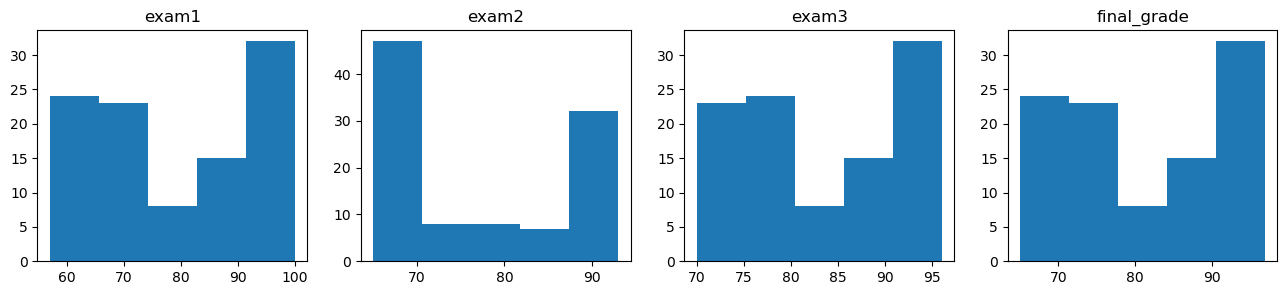

In [48]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1, len(cols) ,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

### What must we do before exploring relationships? 

In [ ]:
#train, validate, test split


## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - histogram
        - boxplot
        - displot
    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot
    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot
        
    - Discrete with Discrete
        - heatmap

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between exam1 and final grade? 

- both of my variables are continious
- check for correlation

### Hypothesis

- ${H_0}$: there is no there ordinal correlation between exam1 and final_grade
- ${H_a}$:  there is a ordinal correlation between exam1 and final_grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [51]:
train.columns


Index(['exam1', 'exam2', 'exam3', 'final_grade'], dtype='object')

In [64]:
# create the correlation matrix using pandas .corr()
exam_corr = train.corr(method='spearman')

In [65]:
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.889858,0.906581,0.970938
exam2,0.889858,1.000000,0.899940,0.830510
exam3,0.906581,0.899940,1.000000,0.922010
final_grade,0.970938,0.830510,0.922010,1.000000


<AxesSubplot:>

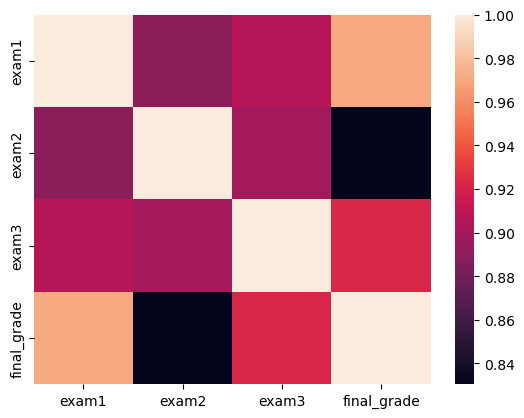

In [66]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)

In [67]:
np.triu(exam_corr)


array([[1.        , 0.88985825, 0.90658142, 0.9709376 ],
       [0.        , 1.        , 0.89993997, 0.83051039],
       [0.        , 0.        , 1.        , 0.92201006],
       [0.        , 0.        , 0.        , 1.        ]])

In [72]:
train.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
61,62,70,79,70
24,57,65,75,65
102,57,65,75,65
50,57,65,75,65


ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

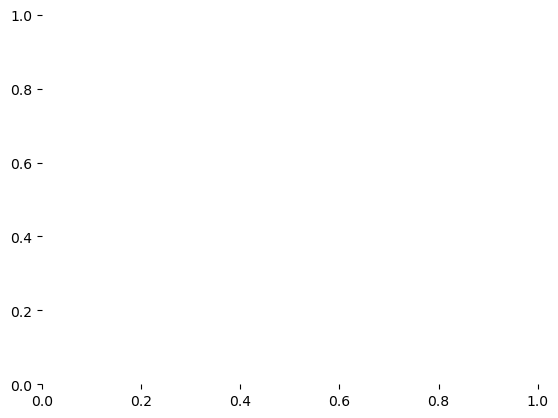

In [68]:
sns.heatmap(exam_corr, color='Purples', annot=True, mask=np.triu(exam_corr))

In [ ]:
# pass my correlation matrix to Seaborn's heatmap with customization


In [ ]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}




### Test Hypothesis

In [79]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
stat , p = spearmanr(train['exam1'], train['final_grade'])
p

3.25228065357342e-35

In [80]:
α = 0.05
if p < α:
    print(f'the p value is less than the alpha, therefore we must reject the null hypothesis')

the p value is less than the alpha, therefore we must reject the null hypothesis


#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

In [ ]:
# I can really pop that line color if I want


### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

In [ ]:
# We can drop the redundant information in the upper right half of the chart if we like.


Takeways
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [82]:
#number of people who failed each test

# first how do ew define failing

for col in train:

    num = (train[col] < 70).sum()
    total = len(train)
    print(f'{num} out of {total} student failed {col}')7

17 out of 56 student failed exam1
21 out of 56 student failed exam2
0 out of 56 student failed exam3
13 out of 56 student failed final_grade


### Make categorical values for further exploration

In [ ]:
#assign fail and pass for each test


### Whats the relationship between passing exam1 and the final_exam grade?

In [ ]:
#seaborn histplot 


In [ ]:
#mean final_grade by exam1 pass/fail status


### What percentage of students failed exam1 and the final?

### Of the students who failed exam1, how many also failed the final?

In [ ]:
#create subset of people who failed exam1


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed both exam1 and exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- if i had time, we could create a new feature that captures if a student failed both exam1 and exam2 